In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")


In [3]:
df.head()
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.columns = df.columns.str.strip()


In [5]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df = df.drop('Loan_ID', axis=1)


In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    df[col] = df[col].fillna(df[col].mode()[0])



In [10]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


In [11]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df['Married'] = df['Married'].map({'Yes':1, 'No':0})
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1, 'No':0})
df['Property_Area'] = df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})


In [13]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)


In [14]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\Users\Bisma Shahzadi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.7886178861788617


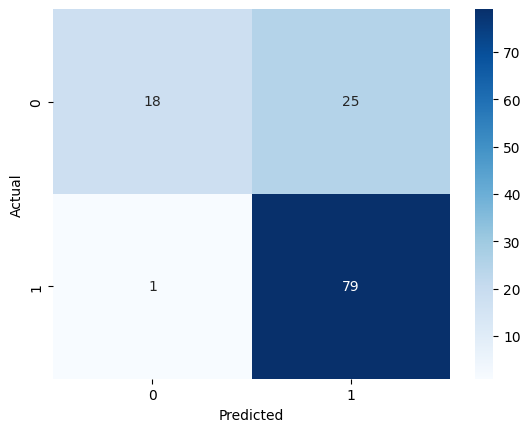

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
test_df = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
test_df.columns = test_df.columns.str.strip()

In [22]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mean())


In [23]:
test_df['Gender'] = test_df['Gender'].map({'Male':1, 'Female':0})
test_df['Married'] = test_df['Married'].map({'Yes':1, 'No':0})
test_df['Education'] = test_df['Education'].map({'Graduate':1, 'Not Graduate':0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes':1, 'No':0})
test_df['Property_Area'] = test_df['Property_Area'].map({'Urban':2, 'Semiurban':1, 'Rural':0})
test_df['Dependents'] = test_df['Dependents'].replace('3+', 3).astype(int)

In [24]:
test_df = test_df.drop('Loan_ID', axis=1, errors='ignore')


In [25]:
test_pred = model.predict(test_df)
test_df['Predicted_Loan_Status'] = test_pred
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,1


In [27]:
# Drop unnecessary columns
test_df = test_df.drop(['Loan_ID', 'Predicted_Loan_Status'], axis=1, errors='ignore')



In [28]:
print(X.columns)
print(test_df.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [29]:
test_pred = model.predict(test_df)
test_df['Predicted_Loan_Status'] = test_pred
test_df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predicted_Loan_Status
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,1
